<a href="https://colab.research.google.com/github/Jack1Hayes/store-analysis-and-future-prediction/blob/main/predict_future_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Explore the data



In [ ]:
train = pd.read_csv('/content/sales_train.csv', parse_dates = ['date'], infer_datetime_format = True, dayfirst = True)
test=pd.read_csv("/content/test.csv")
item_categories=pd.read_csv("/content/item_categories.csv")
items=pd.read_csv("/content/items.csv")
sample_submission=pd.read_csv("/content/sample_submission.csv")
shops=pd.read_csv("/content/shops.csv")

In [ ]:
print(f'the number of rows in the data sales_train : {train.shape[0]}')
print(f'the number of columns in the data : {train.shape[1]}')
print(f'number of values ​​in data sales_train : {train.count().sum()}')
print(f'the number of missing values ​​in the data sales_train : {sum(train.isna().sum())}')
train.head()

the number of rows in the data sales_train : 2935849
the number of columns in the data : 6
number of values ​​in data sales_train : 17615094
the number of missing values ​​in the data sales_train : 0


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [ ]:
print(f'the number of rows in the data test : {test.shape[0]}')
print(f'the number of columns in the data test: {test.shape[1]}')
print(f'number of values ​​in data test : {test.count().sum()}')
print(f'the number of missing values ​​in the data test : {sum(test.isna().sum())}')
test.head()

the number of rows in the data test : 214200
the number of columns in the data test: 3
number of values ​​in data test : 642600
the number of missing values ​​in the data test : 0


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [ ]:
print(f'the number of rows in the data items : {items.shape[0]}')
print(f'the number of columns in the data items: {items.shape[1]}')
print(f'number of values ​​in data items : {items.count().sum()}')
print(f'the number of missing values ​​in the data test : {sum(items.isna().sum())}')
items.head()

the number of rows in the data items : 22170
the number of columns in the data items: 3
number of values ​​in data items : 66510
the number of missing values ​​in the data test : 0


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [ ]:
print(f'the number of rows in the data sample_submission : {sample_submission.shape[0]}')
print(f'the number of columns in the data sample_submission: {sample_submission.shape[1]}')
print(f'number of values ​​in data sample_submission : {sample_submission.count().sum()}')
print(f'the number of missing values ​​in the data sample_submission : {sum(sample_submission.isna().sum())}')
sample_submission.head()

the number of rows in the data sample_submission : 214200
the number of columns in the data sample_submission: 2
number of values ​​in data sample_submission : 428400
the number of missing values ​​in the data sample_submission : 0


,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [ ]:
print(f'the number of rows in the data shops : {shops.shape[0]}')
print(f'the number of columns in the data shops: {shops.shape[1]}')
print(f'number of values ​​in data shops : {shops.count().sum()}')
print(f'the number of missing values ​​in the data shops : {sum(shops.isna().sum())}')
shops.head()

the number of rows in the data shops : 60
the number of columns in the data shops: 2
number of values ​​in data shops : 120
the number of missing values ​​in the data shops : 0


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [ ]:
print(f'the number of rows in the data item_categories : {item_categories.shape[0]}')
print(f'the number of columns in the data item_categories: {item_categories.shape[1]}')
print(f'number of values ​​in data item_categories : {item_categories.count().sum()}')
print(f'the number of missing values ​​in the data item_categories : {sum(item_categories.isna().sum())}')
item_categories.head()

the number of rows in the data item_categories : 84
the number of columns in the data item_categories: 2
number of values ​​in data item_categories : 168
the number of missing values ​​in the data item_categories : 0


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


#### Create a clear EDA and find some insights from the data.


In [ ]:
df_eda = pd.merge(train, shops, how='left', left_on = 'shop_id', right_on = 'shop_id')
df_eda = pd.merge(df_eda, items, how='left', left_on='item_id', right_on='item_id')
df_eda = pd.merge(df_eda, item_categories, how='left', left_on='item_category_id', right_on='item_category_id')
df_eda.drop(['item_id', 'item_category_id', 'shop_id'], axis=1, inplace=True)
df_eda.head()

,date,date_block_num,item_price,item_cnt_day,shop_name,item_name,item_category_name
0,2013-01-02,0,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),Кино - Blu-Ray
1,2013-01-03,0,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,Музыка - Винил
2,2013-01-05,0,899.00,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,Музыка - Винил
3,2013-01-06,0,1709.05,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,Музыка - Винил
4,2013-01-15,0,1099.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),Музыка - CD фирменного производства


In [ ]:
print(df_eda.shape)

(2935849, 7)


In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 7 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   date_block_num      int64         
 2   item_price          float64       
 3   item_cnt_day        float64       
 4   shop_name           object        
 5   item_name           object        
 6   item_category_name  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 179.2+ MB


#### change the data type of column 'date'

In [ ]:
df_eda['date'] = pd.to_datetime(df_eda['date'])
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 7 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   date_block_num      int64         
 2   item_price          float64       
 3   item_cnt_day        float64       
 4   shop_name           object        
 5   item_name           object        
 6   item_category_name  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 179.2+ MB


#### Check if we have duplicate rows.

In [ ]:
df_eda.duplicated().sum()

6

In [ ]:
# Take a look at the duplicate lines (first lines)
df_eda[df_eda.duplicated(keep='first')]

,date,date_block_num,item_price,item_cnt_day,shop_name,item_name,item_category_name
76962,2013-01-05,0,149.0,1.0,"Химки ТЦ ""Мега""",УЧЕНИК ЧАРОДЕЯ (регион),Кино - DVD
1435367,2014-02-23,13,999.0,1.0,"Тюмень ТЦ ""Гудвин""","Far Cry 3 (Classics) [Xbox 360, русская версия]",Игры - XBOX 360
1496766,2014-03-23,14,999.0,1.0,"Москва МТРЦ ""Афи Молл""","Far Cry 3 (Classics) [Xbox 360, русская версия]",Игры - XBOX 360
1671873,2014-05-01,16,999.0,1.0,"Тюмень ТЦ ""Гудвин""","Far Cry 3 (Classics) [Xbox 360, русская версия]",Игры - XBOX 360
1866340,2014-07-12,18,999.0,1.0,"Москва ТРК ""Атриум""","Far Cry 3 (Classics) [Xbox 360, русская версия]",Игры - XBOX 360
2198566,2014-12-31,23,499.0,1.0,"СПб ТК ""Невский Центр""",ЧЕЛОВЕК ДОЖДЯ (BD),Кино - Blu-Ray


#### Take a look at the duplicate lines (second lines)

In [ ]:
df_eda[df_eda.duplicated(keep='last')]

,date,date_block_num,item_price,item_cnt_day,shop_name,item_name,item_category_name
76961,2013-01-05,0,149.0,1.0,"Химки ТЦ ""Мега""",УЧЕНИК ЧАРОДЕЯ (регион),Кино - DVD
1435365,2014-02-23,13,999.0,1.0,"Тюмень ТЦ ""Гудвин""","Far Cry 3 (Classics) [Xbox 360, русская версия]",Игры - XBOX 360
1496765,2014-03-23,14,999.0,1.0,"Москва МТРЦ ""Афи Молл""","Far Cry 3 (Classics) [Xbox 360, русская версия]",Игры - XBOX 360
1671872,2014-05-01,16,999.0,1.0,"Тюмень ТЦ ""Гудвин""","Far Cry 3 (Classics) [Xbox 360, русская версия]",Игры - XBOX 360
1866322,2014-07-12,18,999.0,1.0,"Москва ТРК ""Атриум""","Far Cry 3 (Classics) [Xbox 360, русская версия]",Игры - XBOX 360
2198564,2014-12-31,23,499.0,1.0,"СПб ТК ""Невский Центр""",ЧЕЛОВЕК ДОЖДЯ (BD),Кино - Blu-Ray


In [ ]:
# Delete duplicate lines
df_eda.drop_duplicates(keep='first', inplace=True)
df_eda.duplicated().sum()

0

# Data Viz


#### Create a bar chart to browse sales by store name


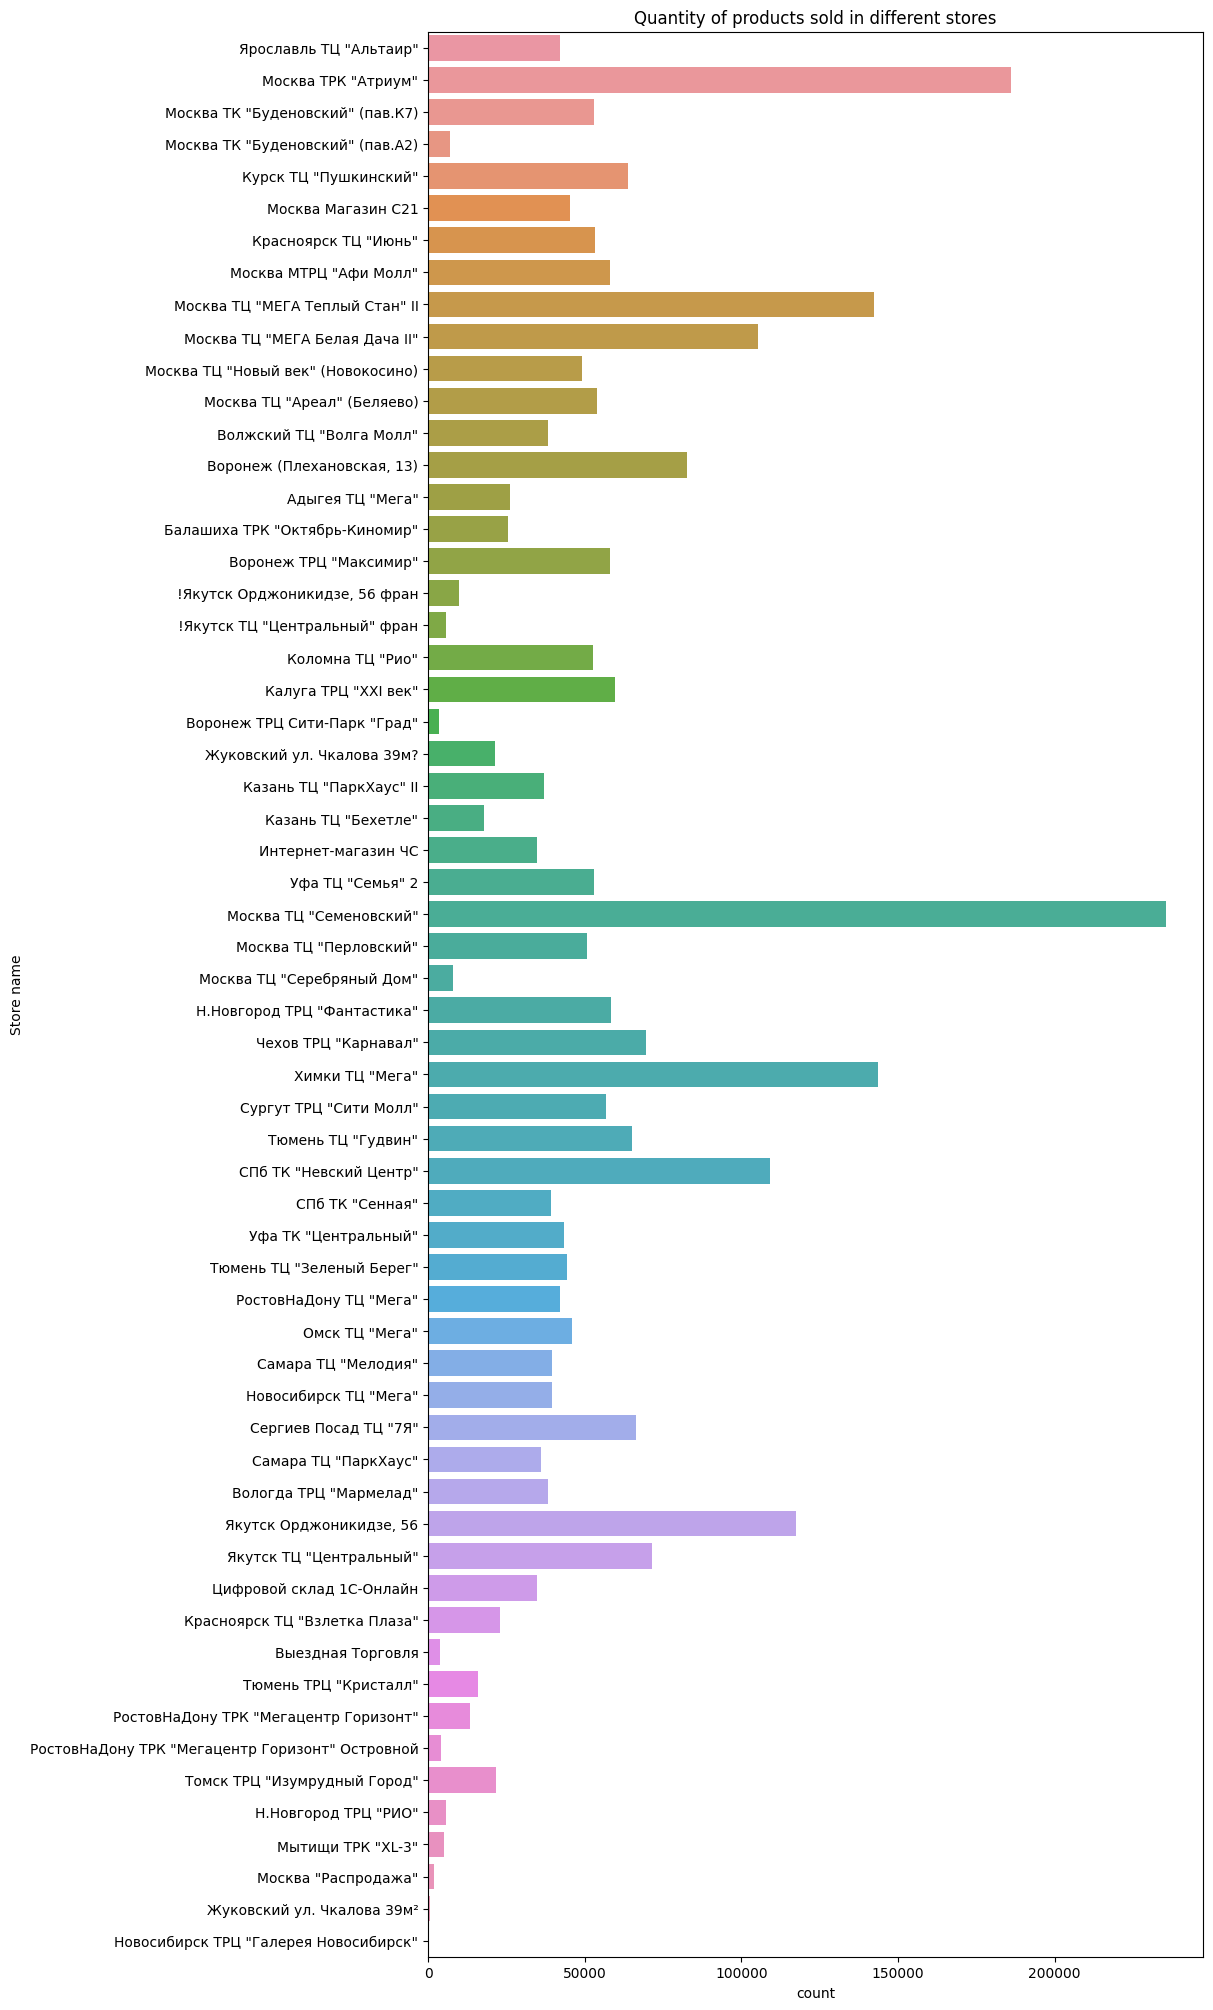

In [ ]:
plt.figure(figsize=(10, 25))
sns.countplot(y=df_eda['shop_name'])
plt.ylabel('Store name')
plt.title('Quantity of products sold in different stores')
plt.show()

#### Find and plan your top 10 products

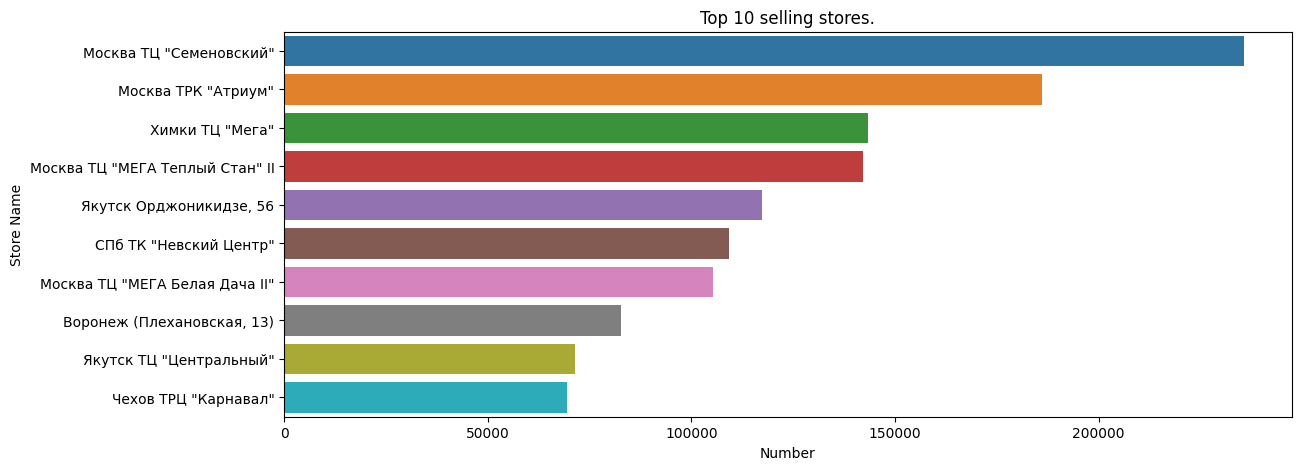

In [ ]:
top_10_selling_item = df_eda['shop_name'].value_counts().head(10)
top_10_selling_item = top_10_selling_item.to_frame().reset_index()
top_10_selling_item.columns = ['shop_name', 'count']
plt.figure(figsize=(13, 5))
sns.barplot(data=top_10_selling_item, x='count', y='shop_name')
plt.title('Top 10 selling stores.')
plt.ylabel('Store Name')
plt.xlabel('Number')
plt.show()

#### Plot top 10 selling categories of products

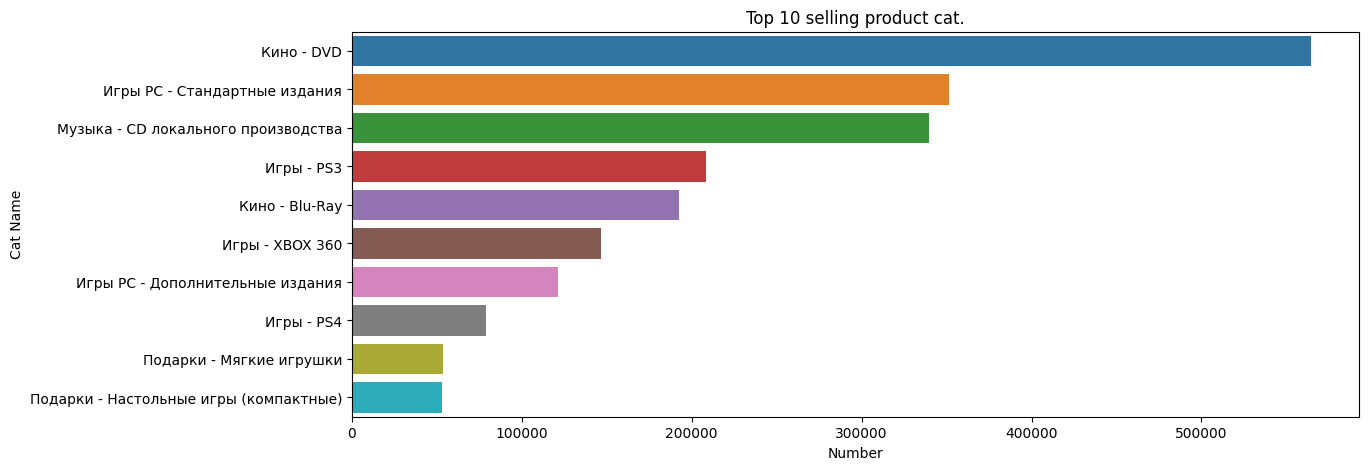

In [ ]:
top_10_selling_category = df_eda['item_category_name'].value_counts().head(10)
top_10_selling_category = top_10_selling_category.to_frame().reset_index()
top_10_selling_category.columns = ['item_name', 'count']
plt.figure(figsize=(13, 5))
sns.barplot(data=top_10_selling_category, x='count', y='item_name')
plt.title('Top 10 selling product cat.')
plt.ylabel('Cat Name')
plt.xlabel('Number')
plt.show()

#### Function to plot trends from column list.

In [ ]:
def plot_trend(columns):
    for column in columns:
        movies = df_eda[df_eda['item_category_name'] == column]
        movies = movies.groupby('date_block_num')['item_cnt_day'].sum().to_frame().reset_index()
        plt.figure(figsize=(20,4))
        plt.axhline (y =movies['item_cnt_day'].mean(), color='red', linewidth = 1, linestyle ='dashed', label = 'Average sales for all time.')
        sns.lineplot(data=movies, x='date_block_num', y='item_cnt_day', label = 'Trend line.')
        plt.title('likelihood to buy ' + str(column) + '.', fontsize=14)
        plt.legend(loc = 'upper right')
        plt.xlabel('Number of Months (from January 2013 to October 2015)')
        plt.ylabel('Products sold')
        plt.show()
        print('\n')

#### Calling the function from the previous cell

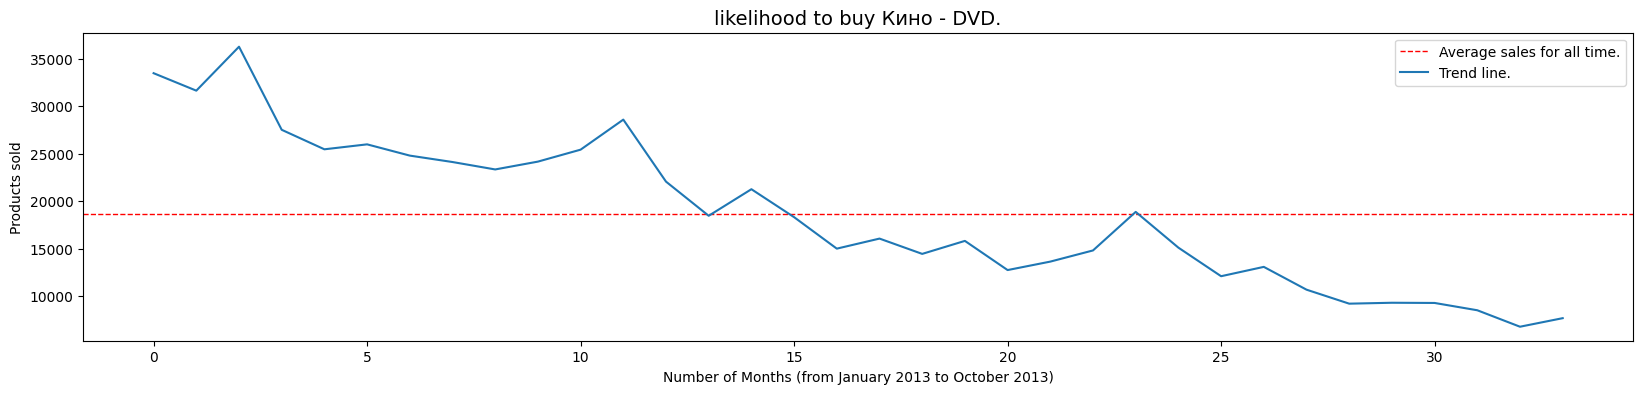

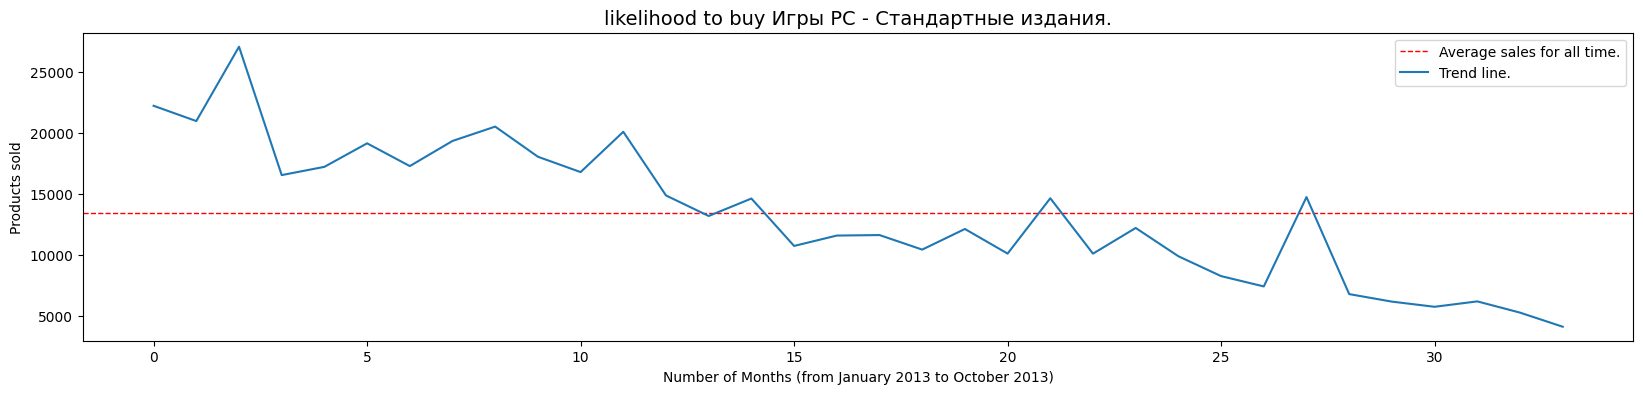

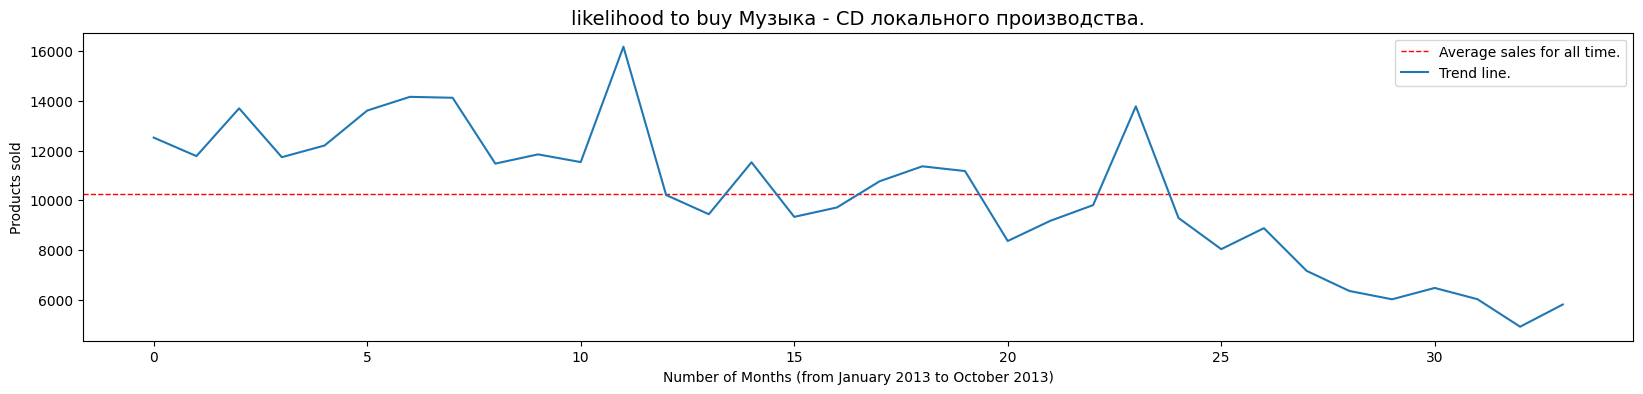

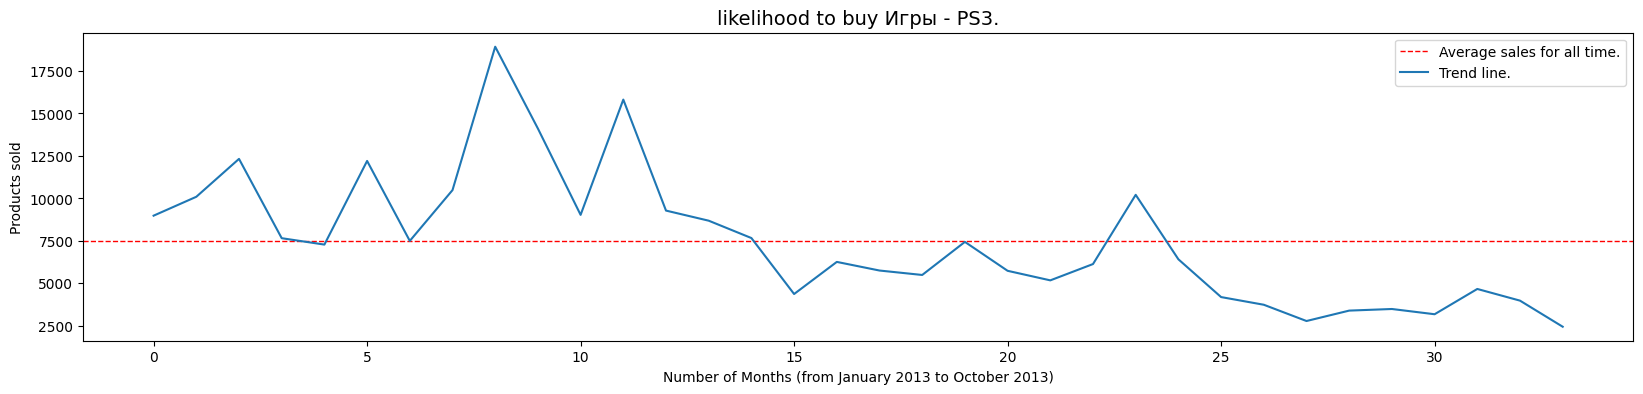

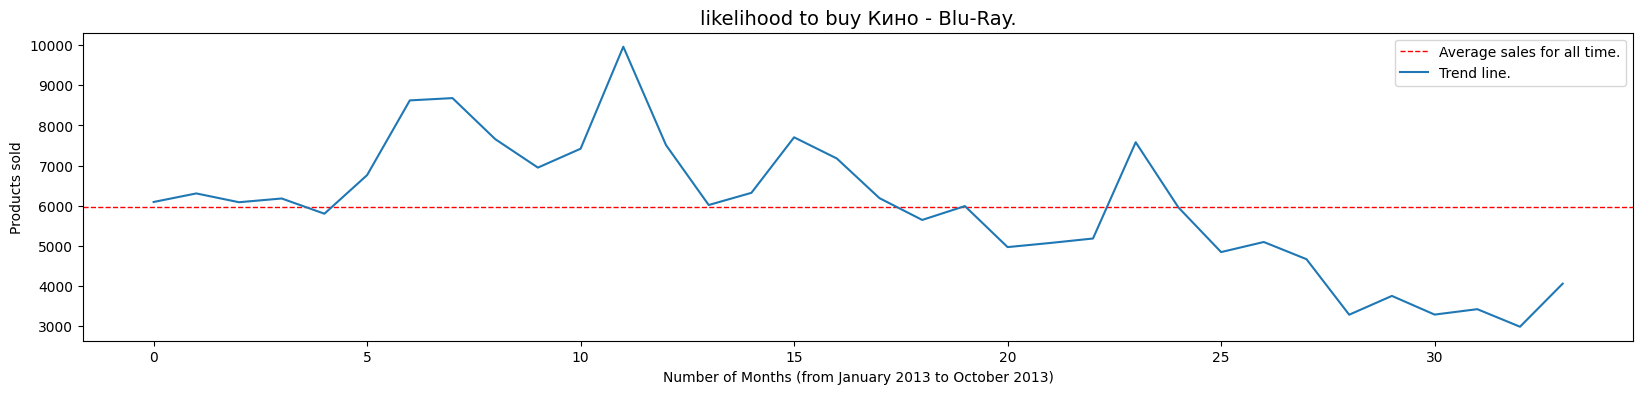

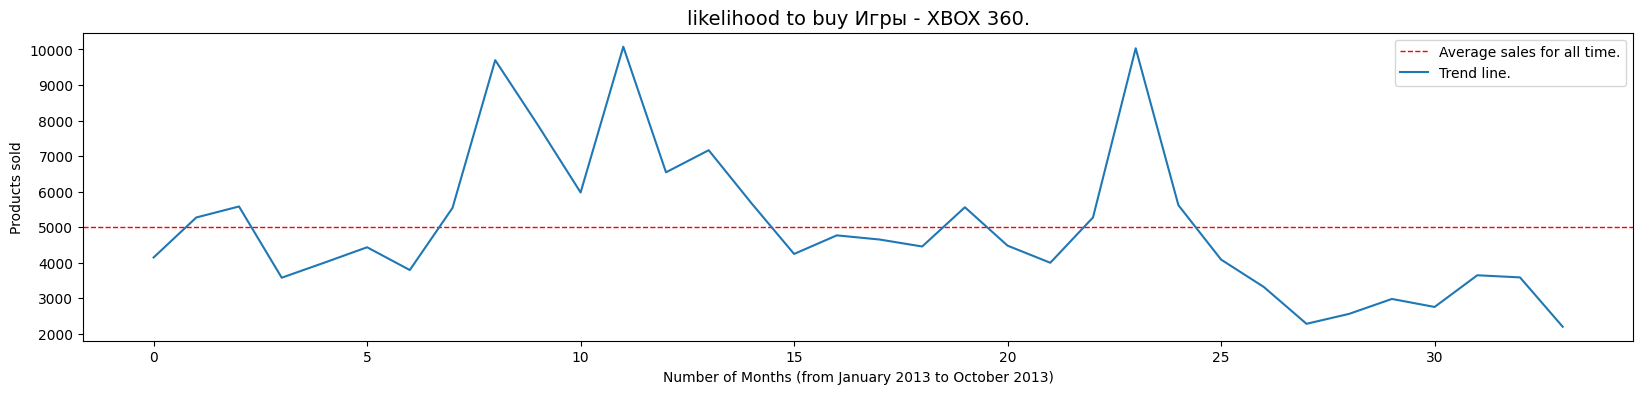

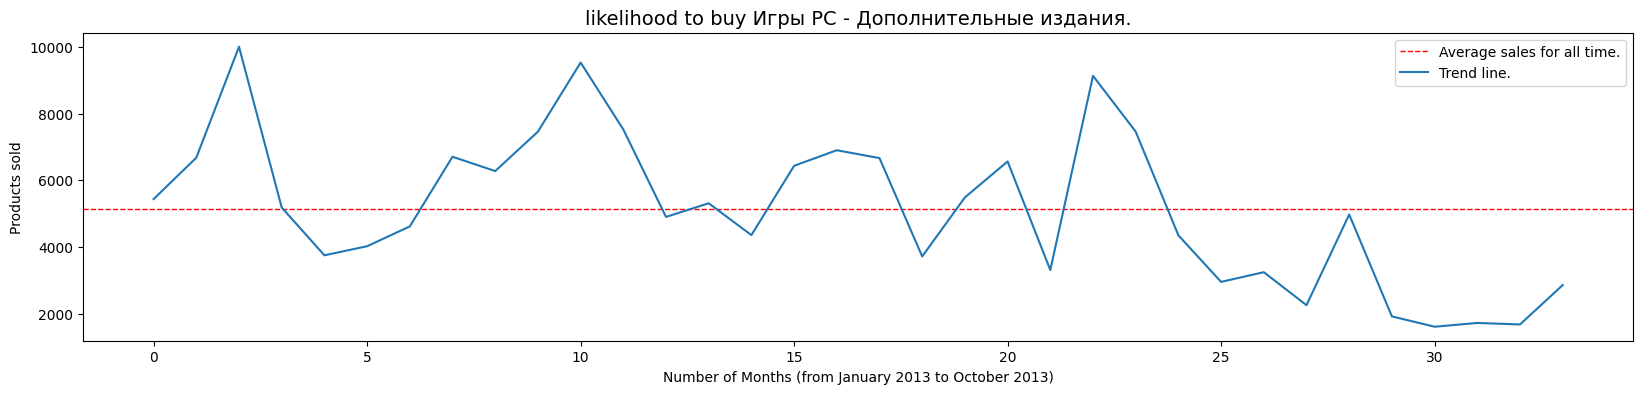

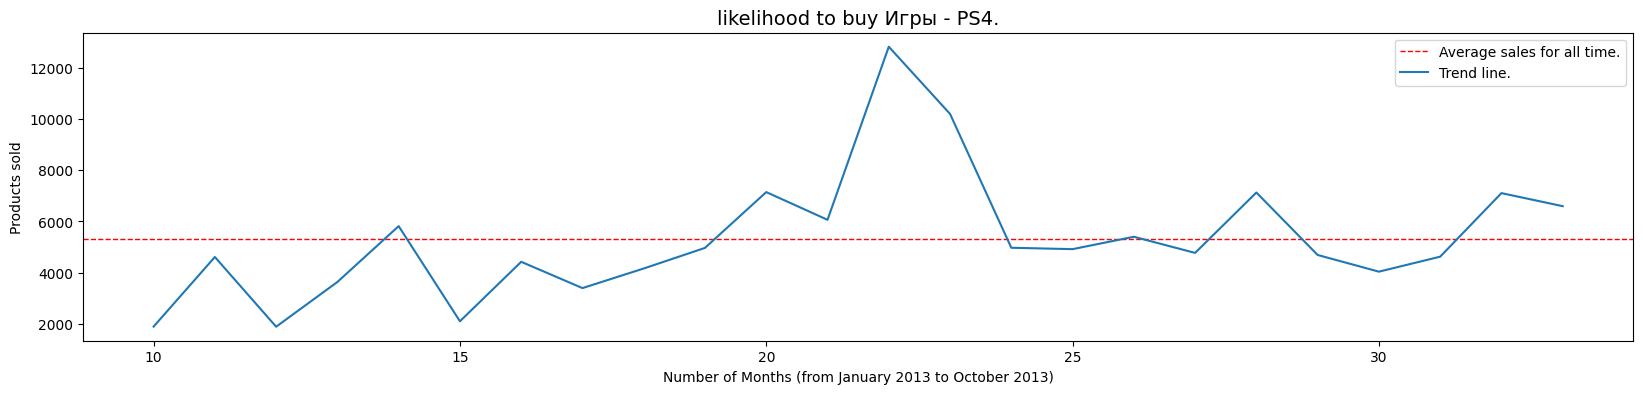

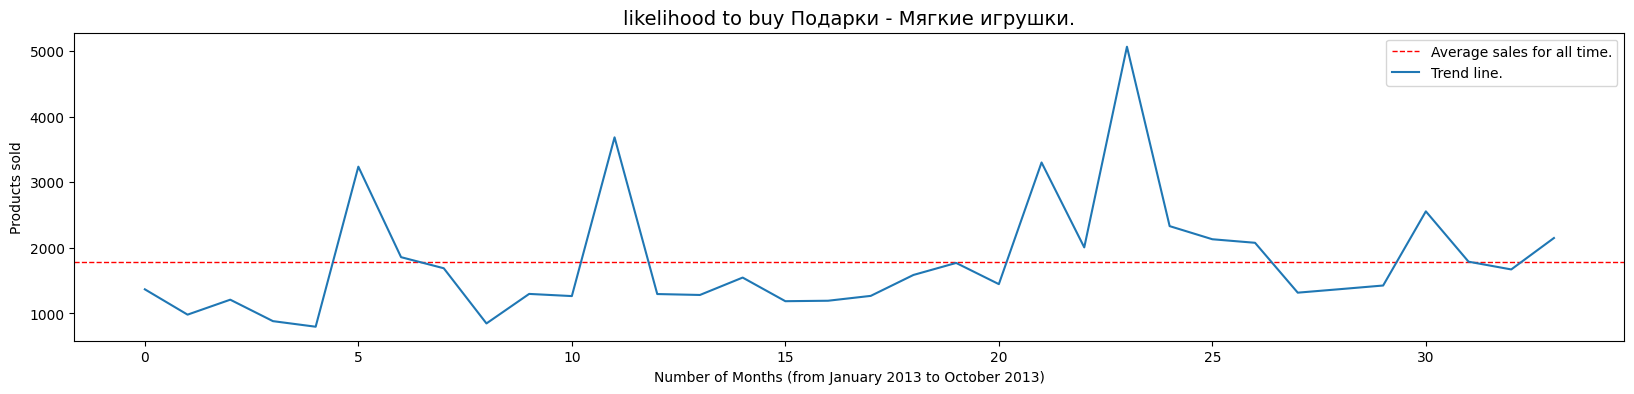

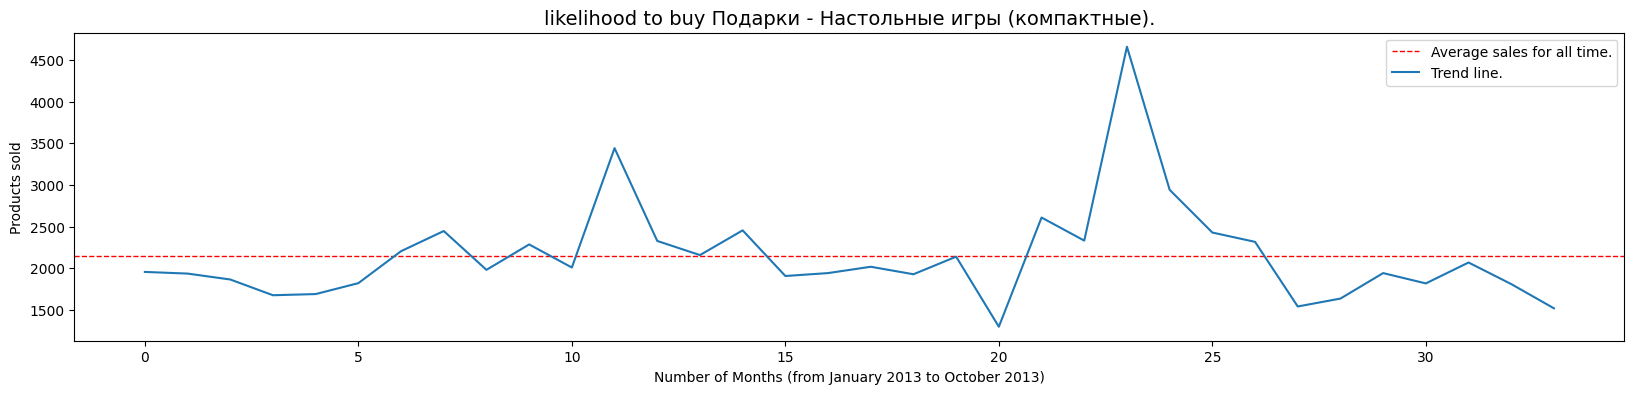

In [ ]:
plot_trend(list(top_10_selling_category['item_name']))

### Here we can clearly see the trend increasing in the category "gifts", "board games" and "games for ps4", while in other categories the trend seems to decrease

#### looking at the number of different categories

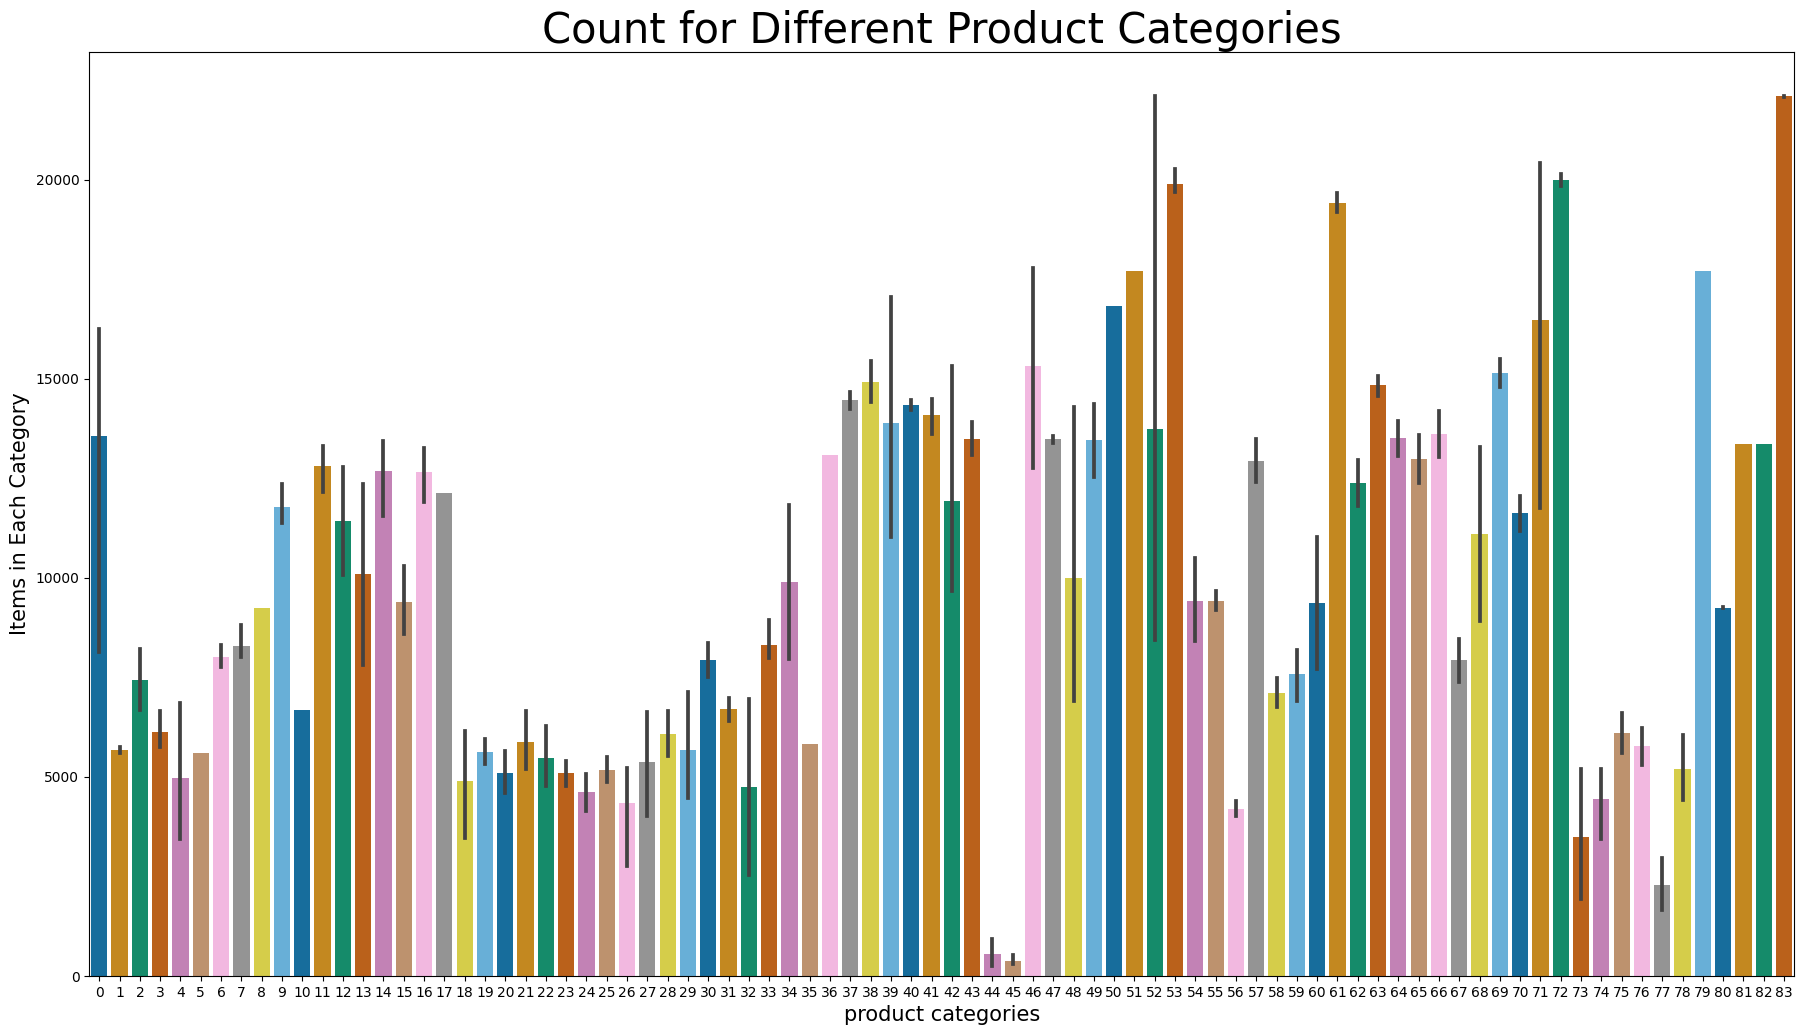

In [ ]:
plt.rcParams['figure.figsize'] = (22, 12)
sns.barplot(x = items['item_category_id'], y = items['item_id'], palette = 'colorblind')
plt.title('Count for Different Product Categories', fontsize = 30)
plt.xlabel('product categories', fontsize = 15)
plt.ylabel('Items in Each Category', fontsize = 15)
plt.show()

#### take a look at the daily distribution of products sold

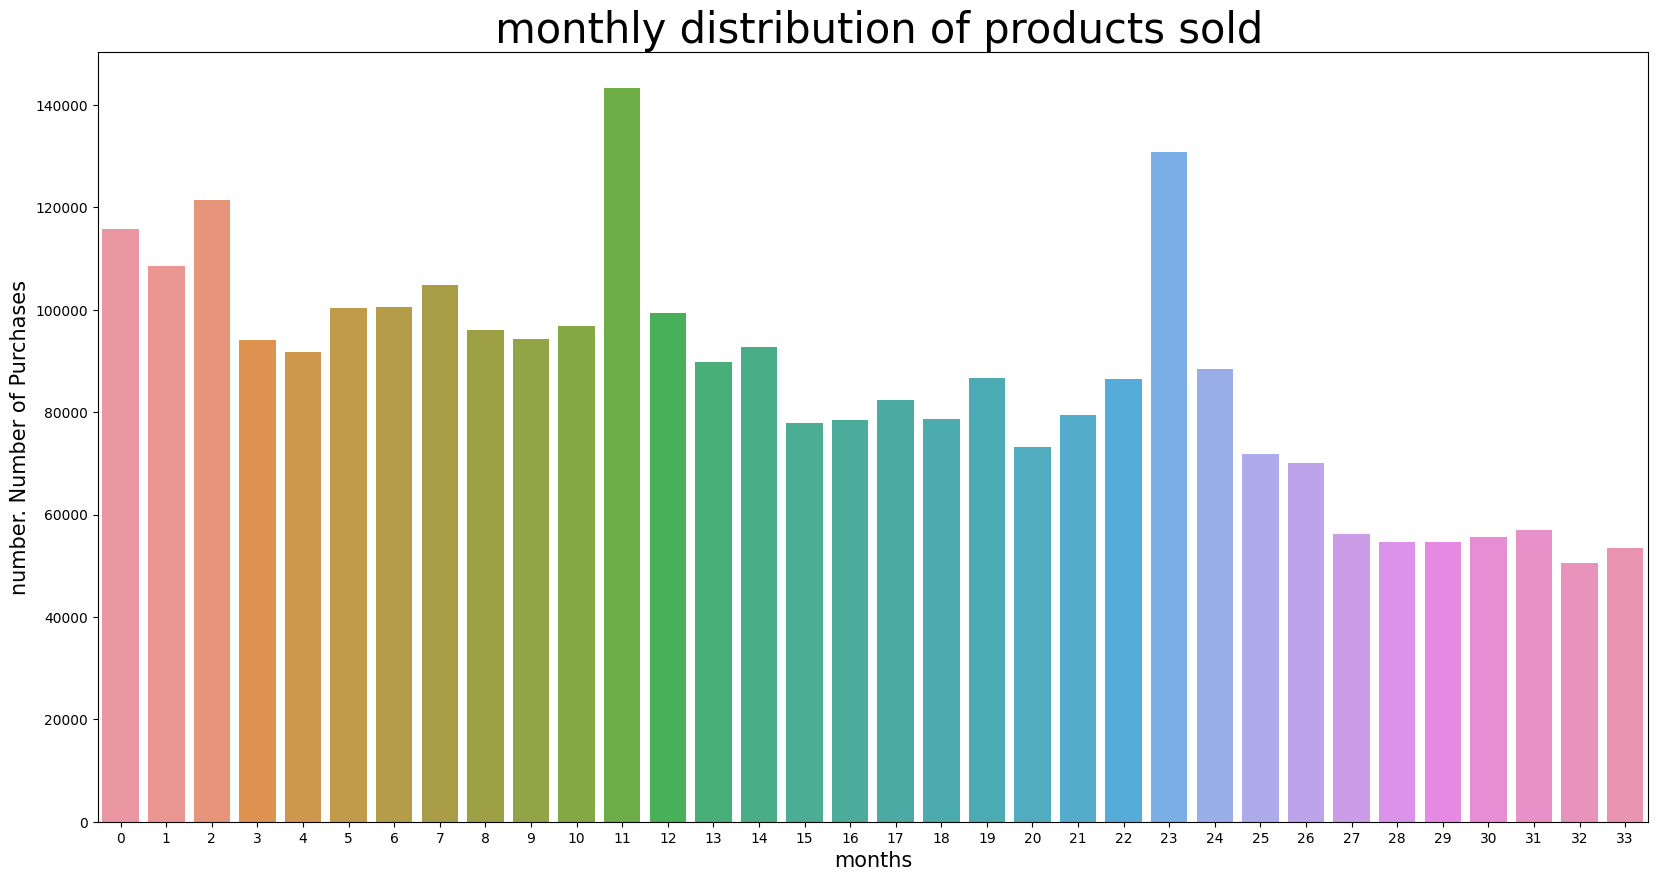

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x = train['date_block_num'])
plt.title(' monthly distribution of products sold', fontsize = 30)
plt.xlabel('months', fontsize = 15)
plt.ylabel('number. Number of Purchases', fontsize = 15)
plt.show()

#### converting data to monthly sales data

In [ ]:
# create a dataset with only monthly sales data
data = train.groupby([train['date'].apply(lambda x: x.strftime('%Y-%m')),'item_id','shop_id']).sum().reset_index()

In [ ]:
# specify the important features we want to add to the data
data = data[['date','item_id','shop_id','item_cnt_day']]

In [ ]:
# finally we can select specific features from the dataset that are important
data = data.pivot_table(index=['item_id','shop_id'], columns = 'date', values = 'item_cnt_day', fill_value = 0).reset_index()

In [ ]:
# looking at newly prepared dataset
data.shape

(424124, 36)

In [ ]:
# Let's combine the prepared monthly sales data with the test data set
test = pd.merge(test, data, on = ['item_id', 'shop_id'], how = 'left')

In [ ]:
# filling in blanks in the dataset
test.fillna(0, inplace = True)

In [ ]:
# check the dataset
test.head()

,ID,shop_id,item_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Building

#### now let's generate real training data

In [ ]:
x_train = test.drop(['2015-10', 'item_id', 'shop_id'], axis = 1)
y_train = test['2015-10']

#### delete the first column so it can predict future sales data

In [ ]:
x_test = test.drop(['2013-01', 'item_id', 'shop_id'], axis = 1)

In [ ]:
# checking the shapes of datasets
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_train.shape)

Shape of x_train : (214200, 34)
Shape of x_test : (214200, 34)
Shape of y_test : (214200,)


In [ ]:
# Let's check the x_train dataset
x_train.head()

,ID,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,...,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Let's check the x_test data
x_test.head()

,ID,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### split data into train and current dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

In [ ]:
print("Shape of x_train :", x_train.shape)
print("Shape of x_valid :", x_valid.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_valid :", y_valid.shape)

Shape of x_train : (171360, 34)
Shape of x_valid : (42840, 34)
Shape of y_train : (171360,)
Shape of y_valid : (42840,)


## LGBMRegressor

In [ ]:
from lightgbm import LGBMRegressor

model_lgb = LGBMRegressor( n_estimators=200,
                           learning_rate=0.03,
                           num_leaves=32,
                           colsample_bytree=0.9497036,
                           subsample=0.8715623,
                           max_depth=8,
                           reg_alpha=0.04,
                           reg_lambda=0.073,
                           min_split_gain=0.0222415,
                           min_child_weight=40)
model_lgb.fit(x_train, y_train)

y_pred_lgb = model_lgb.predict(x_test)

In [ ]:
y_pred_lgb = model_lgb.predict(x_test).clip(0., 20.)

#### Create a predict file

In [ ]:
preds = pd.DataFrame(y_pred_lgb, columns=['item_cnt_month'])
preds.to_csv('pred.csv',index_label='ID')

In [ ]:
import tkinter as tk
from tkinter import *
from tkinter import ttk
from PIL import ImageTk,Image
import matplotlib.pyplot as plt
import re
import nltk
import string
from nltk.corpus import *
from wordcloud import *
from sklearn import *
from sklearn.model_selection import *
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import *
from sklearn.decomposition import *
from sklearn.tree import *
from sklearn.feature_extraction.text import *
from sklearn.linear_model import *
from sklearn.ensemble import *
import xgboost as xgb
from sklearn.metrics import *
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
item_categories,items,sales_train,sample,shops,test=pd.read_csv('/content/item_categories.csv'),\
pd.read_csv('/content/items.csv'), \
    pd.read_csv('/content/sales_train.csv'),\
pd.read_csv('/content/sample_submission.csv'),\
        pd.read_csv('/content/shops.csv'),\
pd.read_csv('/content/test.csv')

In [ ]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [ ]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [ ]:
items_df=pd.merge(items,item_categories,how='left',left_on='item_category_id',right_on='item_category_id')
items_df.head()

,item_name,item_id,item_category_id,item_category_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,Программы - Для дома и офиса (Цифра)
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD
4,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD


In [ ]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [ ]:
train_df=pd.merge(sales_train,items_df,how='left',left_on='item_id',right_on='item_id')
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства


In [ ]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [ ]:
train_df=pd.merge(train_df,shops,how='left',left_on='shop_id',right_on='shop_id')
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""


In [ ]:
train_df['year'] = pd.DatetimeIndex(train_df['date']).year
train_df['month'] = pd.DatetimeIndex(train_df['date']).month
train_df['day'] = pd.DatetimeIndex(train_df['date']).day

In [ ]:
train_df.drop('date',axis=1,inplace=True)

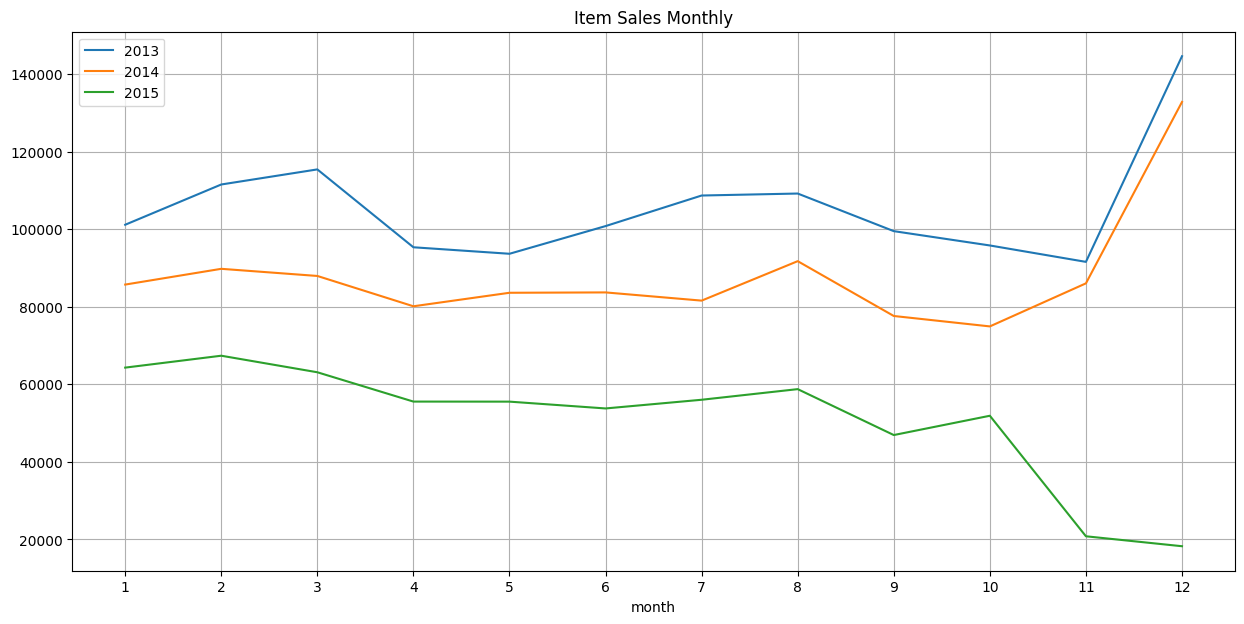

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
plt.xticks([i for i in range(1,13)])
train_df.groupby(train_df[train_df['year']==2013].month).count()['item_id'].plot(ax=ax,label=2013)
train_df.groupby(train_df[train_df['year']==2014].month).count()['item_id'].plot(label=2014)
train_df.groupby(train_df[train_df['year']==2015].month).count()['item_id'].plot(label=2015)
plt.grid("on")
plt.title("Item Sales Monthly")
plt.legend()

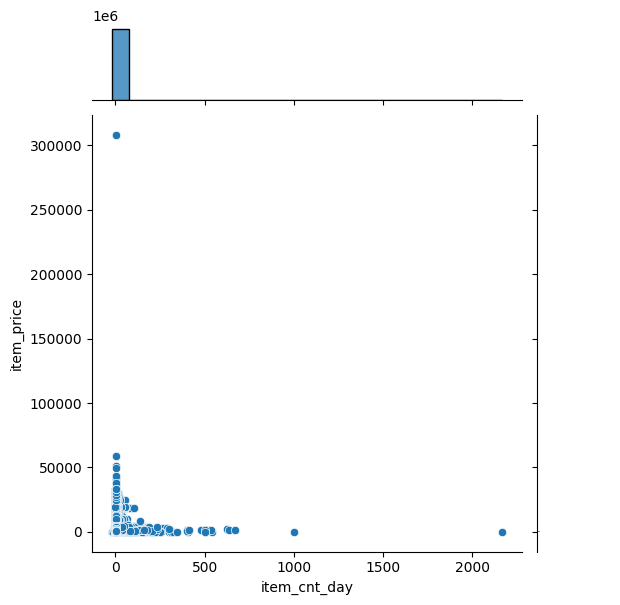

In [ ]:
sns.jointplot(x="item_cnt_day", y="item_price", data=train_df)
plt.show()

In [ ]:
train_df.isnull().sum()

date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
item_name             0
item_category_id      0
item_category_name    0
shop_name             0
year                  0
month                 0
day                   0
dtype: int64

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date_block_num      int64  
 1   shop_id             int64  
 2   item_id             int64  
 3   item_price          float64
 4   item_cnt_day        float64
 5   item_name           object 
 6   item_category_id    int64  
 7   item_category_name  object 
 8   shop_name           object 
 9   year                int64  
 10  month               int64  
 11  day                 int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 291.2+ MB


In [ ]:
train_df.shape

(2935849, 12)

In [ ]:
train_df.drop_duplicates()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,year,month,day
0,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",2013,2,1
1,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",2013,3,1
2,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",2013,5,1
3,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",2013,6,1
4,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум""",2013,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,33,25,7409,299.00,1.0,V/A Nu Jazz Selection (digipack),55,Музыка - CD локального производства,"Москва ТРК ""Атриум""",2015,10,10
2935845,33,25,7460,299.00,1.0,V/A The Golden Jazz Collection 1 2CD,55,Музыка - CD локального производства,"Москва ТРК ""Атриум""",2015,9,10
2935846,33,25,7459,349.00,1.0,V/A The Best Of The 3 Tenors,55,Музыка - CD локального производства,"Москва ТРК ""Атриум""",2015,10,14
2935847,33,25,7440,299.00,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,Музыка - MP3,"Москва ТРК ""Атриум""",2015,10,22


In [ ]:
train_df.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day',
       'item_name', 'item_category_id', 'item_category_name', 'shop_name',
       'year', 'month', 'day'],
      dtype='object')

In [ ]:
train_df.drop(train_df[train_df.item_price > 3 * train_df.item_price.std()].index, inplace = True)
train_df.drop(train_df[train_df.item_cnt_day > 3 * train_df.item_cnt_day.std()].index, inplace = True)
train_df.drop(train_df[train_df.item_price < 0].index, inplace = True)
train_df.drop(train_df[train_df.item_cnt_day < 0].index, inplace = True)

In [ ]:
train_df['revenue'] = train_df.item_price * train_df.item_cnt_day

In [ ]:
df=train_df.pivot_table(index=['shop_id', 'item_id'], columns='date_block_num', values='item_cnt_day', aggfunc='sum').fillna(0.0)
df.head()

date_block_num    0     1    2    3    4    5    6    7    8    9   ...   24  \
shop_id item_id                                                     ...        
0       30       0.0  22.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        31       0.0  11.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        32       6.0  10.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        33       3.0   3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        35       1.0  14.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

date_block_num    25   26   27   28   29   30   31   32   33  
shop_id item_id                                               
0       30       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        31       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        32       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        33       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        35       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 34 columns]

In [ ]:
train_df = df.reset_index()
train_df["shop_id"] = train_df.shop_id.astype("str")
train_df["item_id"] = train_df.item_id.astype("str")
train_df.head()

date_block_num,shop_id,item_id,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
0,0,30,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,31,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,32,6.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,33,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,35,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
item_cat_df = items.merge(item_categories[['item_category_id','item_category_name']], how="inner", on="item_category_id")[['item_id','item_category_name']]

In [ ]:
item_cat_df['item_id'] = item_cat_df.item_id.astype('str')

In [ ]:
train_df = train_df.merge(item_cat_df, how="inner", on="item_id")

In [ ]:
train_df.dropna(axis=1,inplace=True)

In [ ]:
EN = preprocessing.LabelEncoder()
train_df['item_category_name'] = EN.fit_transform(train_df['item_category_name'])
train_df.head()

,shop_id,item_id,0,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,32,33,item_category_name
0,0,30,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40
1,1,30,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40
2,2,30,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40
3,3,30,0.0,4.0,5.0,2.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,40
4,4,30,0.0,7.0,3.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40


In [ ]:
train_df['item_category_name'] = EN.fit_transform(train_df['item_category_name'])
train_df = train_df[['shop_id', 'item_id', 'item_category_name'] + list(range(34))]
train_df.head()

,shop_id,item_id,item_category_name,0,1,2,3,4,5,6,...,24,25,26,27,28,29,30,31,32,33
0,0,30,40,0.0,22.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,30,40,0.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,30,40,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,30,40,0.0,4.0,5.0,2.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,30,40,0.0,7.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
param = {'max_depth': 15, 
         'subsample': 1,
         'min_child_weight': 1,
         'eta':0.34, 
         'seed':1,
         'verbosity': 1,
         'eval_metric':'rmse'}



xgbtrain = xgb.DMatrix(train_df.iloc[:,  (train_df.columns != 33)].values,
                       train_df.iloc[:, train_df.columns == 33].values)

model = xgb.train(param, xgbtrain)
preds = model.predict(xgb.DMatrix(train_df.iloc[:,  (train_df.columns != 33)].values))
RMSE = np.sqrt(mean_squared_error(preds,train_df.iloc[:, train_df.columns == 33].values))

print(RMSE)

0.41412224329402575


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

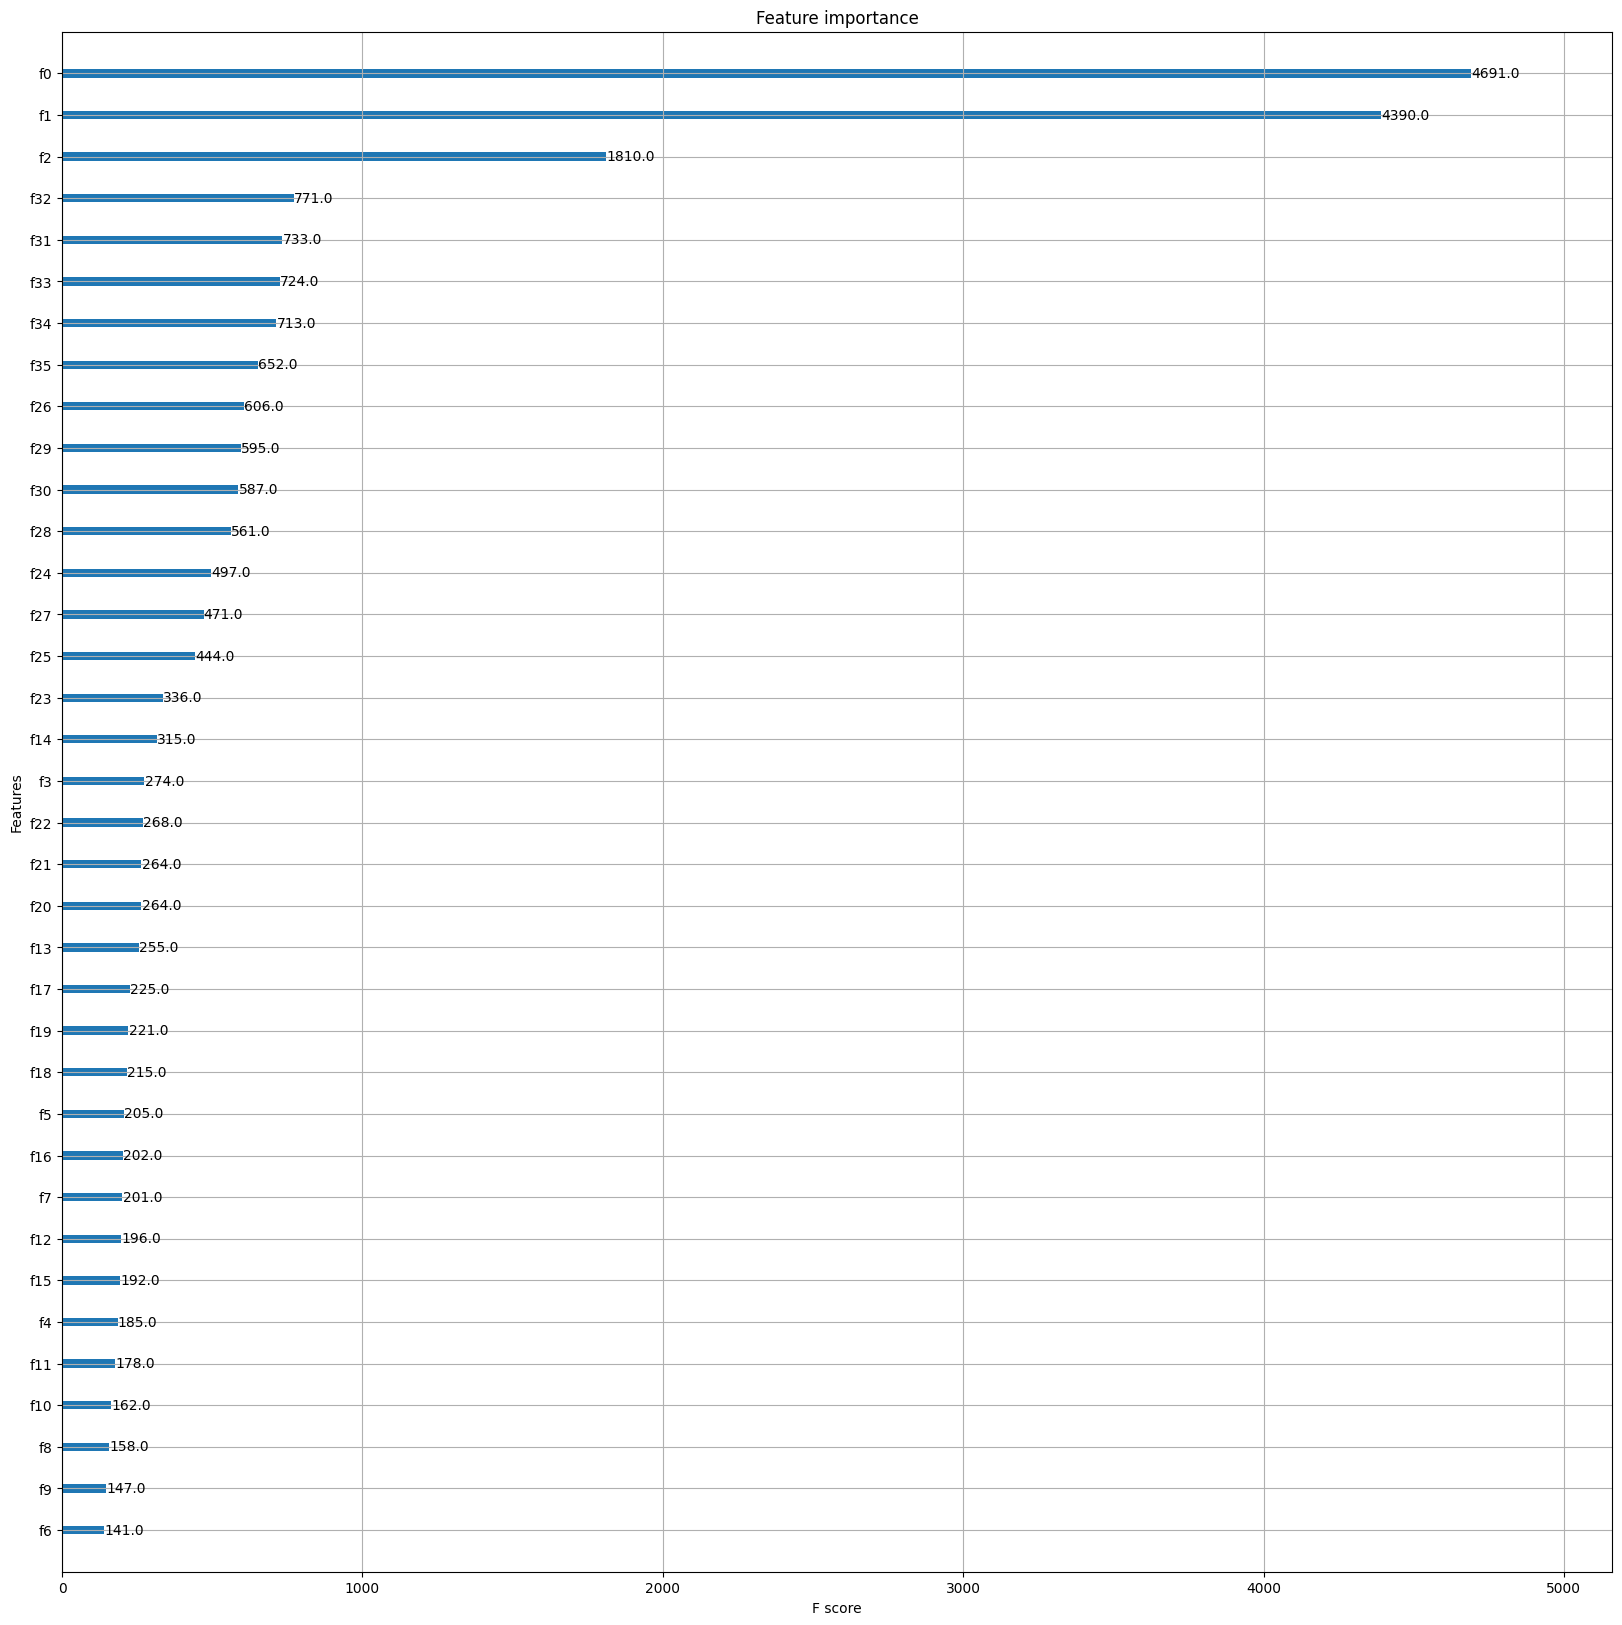

In [ ]:
fig, ax = plt.subplots(figsize = (20, 20))
xgb.plot_importance(model, ax = ax)

In [ ]:
test.shop_id = test.shop_id.astype('str')
test.item_id = test.item_id.astype('str')

In [ ]:
test = test.merge(train_df, how="left", on=["shop_id", "item_id"]).fillna(0.0)
test.head()

,ID,shop_id,item_id,item_category_name,0,1,2,3,4,5,...,24,25,26,27,28,29,30,31,32,33
0,0,5,5037,19.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,19.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,23.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
d = dict(zip(test.columns[4:],list(np.array(list(test.columns[4:])) - 1)))

test = test.rename(d, axis = 1)

In [ ]:
predictions = model.predict(xgb.DMatrix(test.iloc[:, (test.columns != 'ID') & (test.columns != -1)].values))

In [ ]:
predictions = list(map(lambda x: min(20, max(x,0)), list(predictions)))
Pred_list = pd.DataFrame({'ID': test.ID, 'item_cnt_month': predictions})
Pred_list .to_csv('pred.csv', index=False)